In [101]:
from preprocessing import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
df = pd.read_csv('cars.csv')
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_unit,torque_rpm,cars_age
0,Maruti,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.00,2000.0,8
1,Skoda,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.00,1500.0,8
2,Honda,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.46,2700.0,16
3,Hyundai,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.52,1750.0,12
4,Maruti,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.70,4500.0,15


In [103]:
#df_new['n_missing'] = df_new[features].isna().sum(axis=1)
df = fill_nan(df)

# EDA

In [104]:
basic_eda(df)

----------TOP 5 RECORDS--------
      name  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti         450000     145500  Diesel  Individual       Manual   
1    Skoda         370000     120000  Diesel  Individual       Manual   
2    Honda         158000     140000  Petrol  Individual       Manual   
3  Hyundai         225000     127000  Diesel  Individual       Manual   
4   Maruti         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  torque_unit  torque_rpm  \
0   First Owner    23.40  1248.0      74.00    5.0       190.00      2000.0   
1  Second Owner    21.14  1498.0     103.52    5.0       250.00      1500.0   
2   Third Owner    17.70  1497.0      78.00    5.0       124.46      2700.0   
3   First Owner    23.00  1396.0      90.00    5.0       219.52      1750.0   
4   First Owner    16.10  1298.0      88.20    5.0       112.70      4500.0   

   cars_age  
0         8  
1         8  
2        16 

### Dropping index where selling price is maximum

In [54]:
df.drop(labels=df.loc[df['selling_price'] == df['selling_price'].max()].index[0], axis=0, inplace=True)

# Heatmap

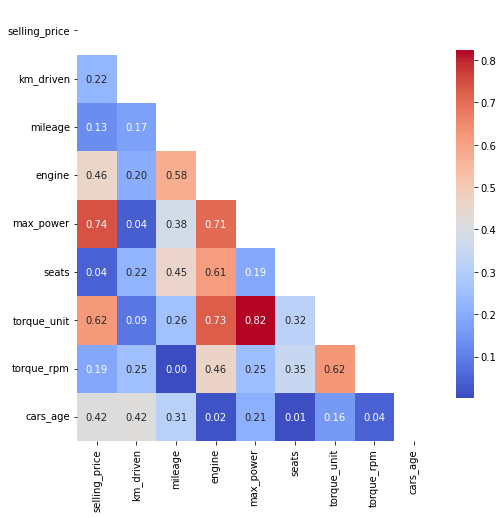

In [55]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(8, 8))
#plot heat map
g=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8})

### Dropping few cols
##### due to having low correleation with selling price

In [56]:
#df.drop(columns=['mileage', 'seats'], inplace=True)
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'name']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [57]:
def plot_dist(df, type=None, cols = 1):
    n_cols = len(df.columns)
    fig = plt.figure(figsize=(15,15))
    for n, col in enumerate(df.columns):
        a = fig.add_subplot(int(np.ceil(n_cols/float(cols))), cols, n + 1)
        if type == 'boxplot':
            sns.boxplot(df[col])
        else:
            sns.distplot(df[col], bins=30, kde=True)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

# Distribution plot

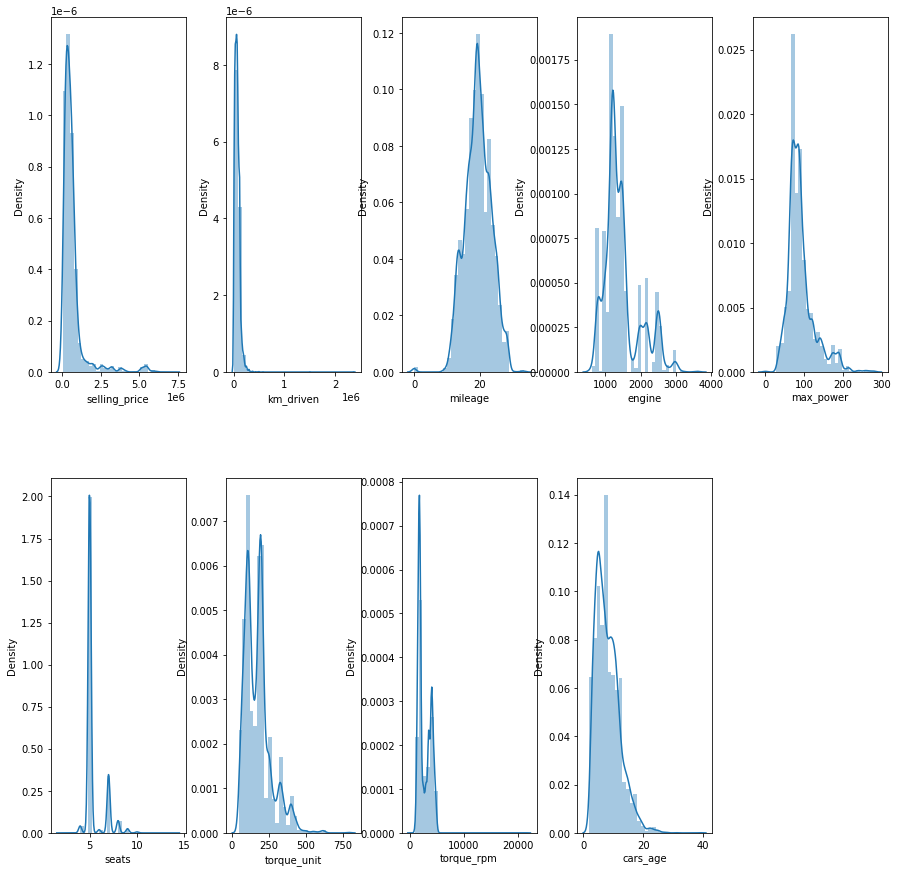

In [58]:
plot_dist(df[num_cols], cols = 5)

# Box Plot

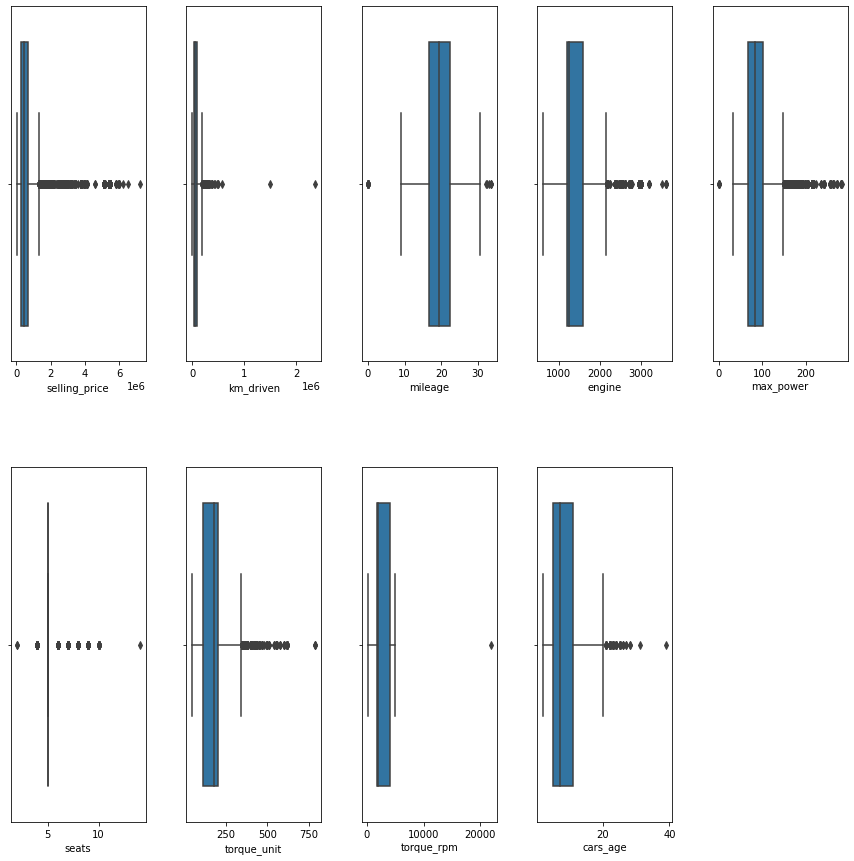

In [59]:
plot_dist(df[num_cols], 'boxplot', cols = 5)

# Removing Outliers

##### Handling outliers in selling_price

In [60]:
IQR = df['selling_price'].quantile(0.75)- df['selling_price'].quantile(0.25)
upper_limit = df.selling_price.quantile(0.75)+(IQR*1.5)
upper_limit

1305001.5

In [61]:
df['selling_price'].loc[df['selling_price'] > upper_limit] = upper_limit

##### Handling outliers in km_driven

In [62]:
IQR = df['km_driven'].quantile(0.75)- df['km_driven'].quantile(0.25)
upper_limit = df['km_driven'].mean()+(IQR*2)
upper_limit

193765.82188389654

In [63]:
df['km_driven'].loc[df['km_driven'] > upper_limit] = upper_limit

##### Handling outliers in Tourqe

In [64]:
IQR = df['torque_rpm'].quantile(0.75)- df['torque_rpm'].quantile(0.25)
upper_limit = df['torque_rpm'].quantile(0.75)+(IQR*1.5)
df['torque_rpm'].loc[df['torque_rpm'] > upper_limit] = upper_limit

In [65]:
IQR = df['torque_unit'].quantile(0.75)- df['torque_unit'].quantile(0.25)
upper_limit = df['torque_unit'].quantile(0.75)+(IQR*1.5)
df['torque_unit'].loc[df['torque_unit'] > upper_limit] = upper_limit

##### Handling outliers in engine

In [66]:
IQR = df['engine'].quantile(0.75)- df['engine'].quantile(0.25)
upper_limit = df['engine'].mean()+(IQR*2)
df['engine'].loc[df['engine'] > upper_limit] = upper_limit

##### Handling outliers in max_power

In [67]:
IQR = df['max_power'].quantile(0.75)- df['max_power'].quantile(0.25)
upper_limit = df['max_power'].mean()+(IQR*2)
lower_limit = df['max_power'].quantile(0.5)

df['max_power'].loc[df['max_power'] > upper_limit] = upper_limit
df['max_power'].loc[df['max_power'] < lower_limit] = lower_limit

##### Handling outliers in cars_age

In [68]:
IQR = df['cars_age'].quantile(0.75)- df['cars_age'].quantile(0.25)
upper_limit = df['cars_age'].mean()+(IQR*3)
df['cars_age'].loc[df['cars_age'] > upper_limit] = int(upper_limit)

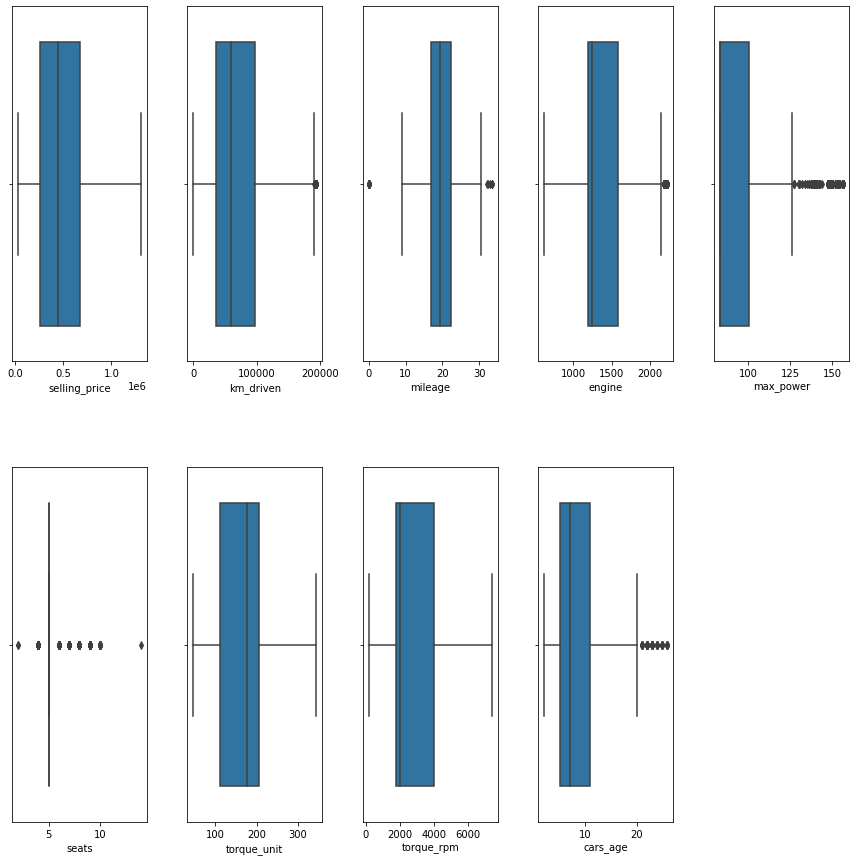

In [69]:
plot_dist(df[num_cols], 'boxplot', cols = 5)

# Fuel Distribution

Text(0.5, 1.0, 'Distribution fuel type')

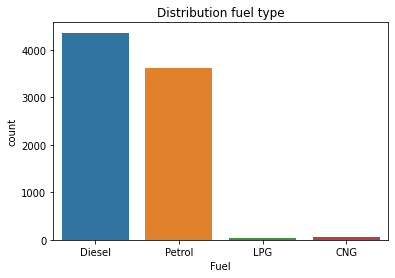

In [70]:
#Distribution fuel type
sns.countplot(x='fuel', data=df)
plt.xlabel('Fuel')
plt.title('Distribution fuel type')

# Type of person selling the car

Text(0.5, 1.0, 'Seller Type')

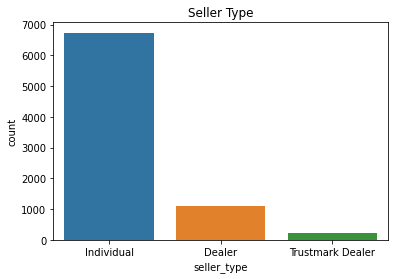

In [71]:
sns.countplot(x='seller_type', data=df)
plt.title('Seller Type')

# Kind of Transmission

Text(0.5, 1.0, 'Engine Transmission')

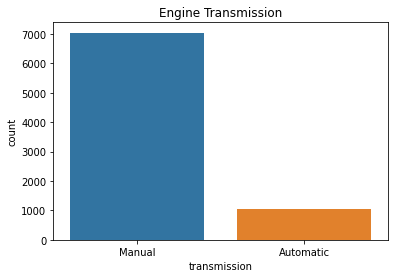

In [72]:
sns.countplot(x='transmission', data=df)
plt.title('Engine Transmission')

# Fuel type, with Transmission hue

Text(0.5, 1.0, 'Transmission-fuel')

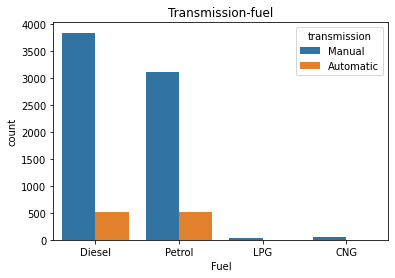

In [73]:
sns.countplot(x='fuel', data=df, hue='transmission')
plt.xlabel('Fuel')
plt.title('Transmission-fuel')

# Kind of Owner

Text(0.5, 1.0, 'Owner')

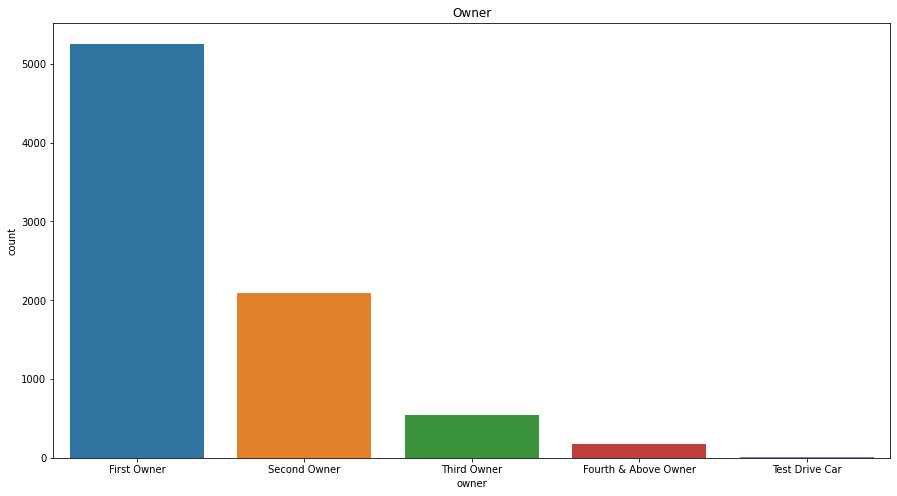

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='owner', data=df, ax=ax)
plt.title('Owner')

# Seats

Text(0.5, 1.0, 'Seats')

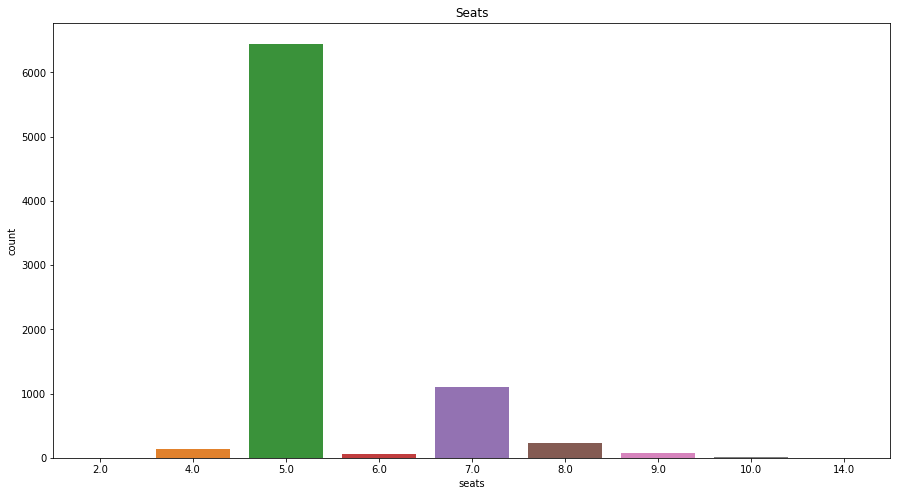

In [75]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='seats', data=df, ax=ax)
plt.title('Seats')

# Cars

<AxesSubplot:>

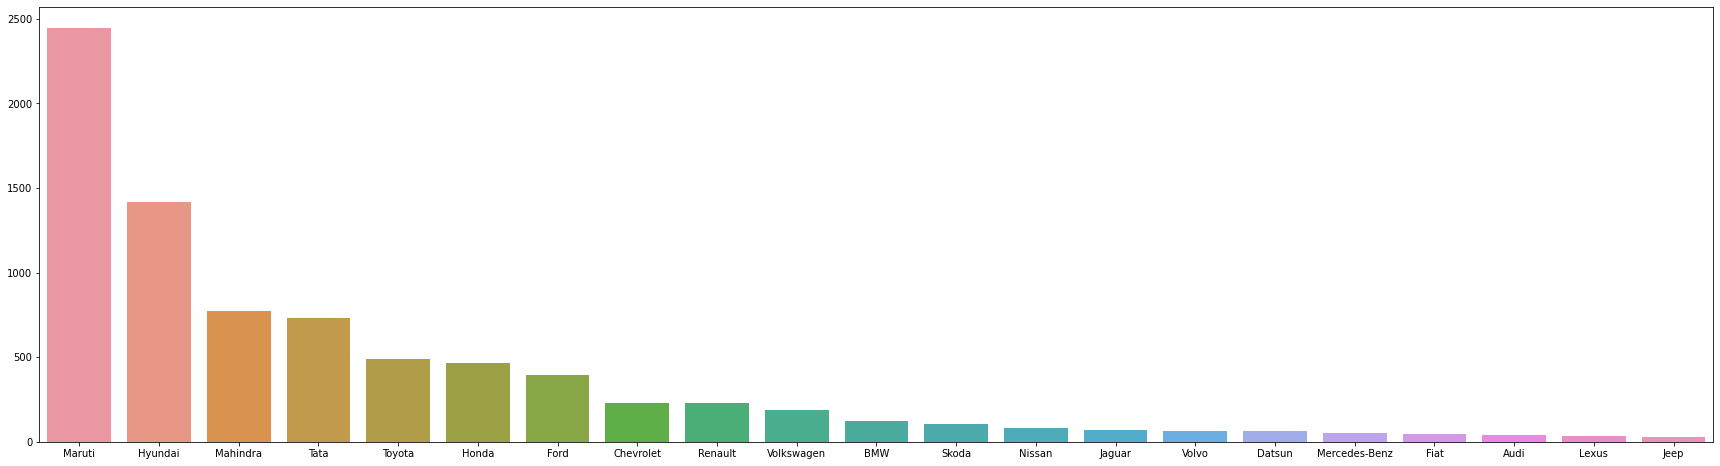

In [76]:
fig, ax = plt.subplots(figsize=(30,8))
sns.barplot(x=df['name'].value_counts().index, y=df['name'].value_counts().values, ax=ax)

# Training

In [77]:
y = df['selling_price'].astype(int).to_numpy().reshape(-1,1)
df.drop(['selling_price'], axis=1, inplace=True)
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
onehotencoded_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() < 10]
num_cols = [col for col in df.columns if df[col].dtype != 'object']
#df['min_row'] = df[num_cols].min(axis=1)
# df['max_row'] = df[num_cols].max(axis=1)
# df['mean_row'] = df[num_cols].mean(axis=1)
# df['std_row'] = df[num_cols].std(axis=1)
df2 = df.copy()

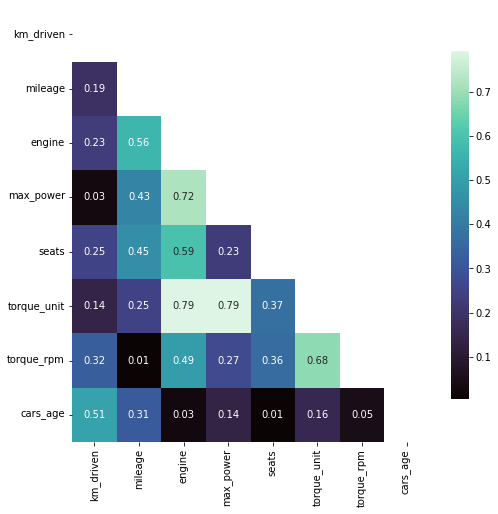

In [78]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(8, 8))
#plot heat map
g=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='mako',
            cbar_kws={"shrink": .8})

In [79]:
le_dict = {}
for col in cat_cols:
    le_dict[col] = LabelEncoder().fit(df2[col])
    df2[col] = le_dict[col].transform(df2[col])
df3 = df2[onehotencoded_cols]
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', dtype=np.int)
df3 = ohe.fit_transform(df3).toarray()
df2.drop(onehotencoded_cols, axis=1, inplace=True)
SC = StandardScaler()
df2[num_cols] = SC.fit_transform(df2[num_cols])
df2 = df2.to_numpy()
new_df = np.concatenate((df2, df3), axis=1)

In [81]:
X = new_df
del df, df2, df3, new_df

# Optimizing

In [365]:
def objective_xgb(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    param = {
        'tree_method':'gpu_hist',  # Use GPU acceleration
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_categorical("n_estimators", [150, 200, 300, 3000]),
        'max_depth': trial.suggest_categorical('max_depth', [4,5,7,9,11,13,15,17]),
        'random_state': 42,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBRegressor(**param)
    model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=False)   
    preds = model.predict(X_test)
    
    rmse = metrics.mean_squared_error(y_test, preds,squared=False)      

    return rmse

In [366]:
def objective_lgbm(trial, X=X, y=y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    param = {
        'metric': 'rmse', 
        'random_state': 42,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = LGBMRegressor(**param)
    model.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)], verbose=False)    
    preds = model.predict(X_test)
    
    rmse = metrics.mean_squared_error(y_test, preds,squared=False)  
     
    return rmse

In [367]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_lgbm, n_trials=50)
params_lgbm = study.best_trial.params
print('Number of finished trials:', len(study.trials))
print('Best trial:', params_lgbm)

[I 2022-05-07 10:18:36,424] A new study created in memory with name: no-name-dfc73074-d099-421c-a90b-3101e6fb04f7
[I 2022-05-07 10:18:49,664] Trial 0 finished with value: 72098.10785205431 and parameters: {'reg_alpha': 8.80313712622317, 'reg_lambda': 0.17051206309982658, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 10, 'num_leaves': 786, 'min_child_samples': 155, 'min_data_per_groups': 13}. Best is trial 0 with value: 72098.10785205431.
[I 2022-05-07 10:18:58,482] Trial 1 finished with value: 72894.82179462652 and parameters: {'reg_alpha': 2.1788905726254963, 'reg_lambda': 0.0017352856007182822, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 45, 'min_child_samples': 114, 'min_data_per_groups': 30}. Best is trial 0 with value: 72098.10785205431.
[I 2022-05-07 10:19:07,882] Trial 2 finished with value: 73039.41704533264 and parameters: {'reg_alpha': 0.3836621578590863, 'reg_lambda': 3.4834456827079645,

Number of finished trials: 50
Best trial: {'reg_alpha': 0.07391963690646053, 'reg_lambda': 1.7228534820031327, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 149, 'min_child_samples': 19, 'min_data_per_groups': 40}


In [368]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_xgb, n_trials=50)
params_xgb = study.best_trial.params
print('Number of finished trials:', len(study.trials))
print('Best trial:', params_xgb)

[I 2022-05-07 10:28:16,755] A new study created in memory with name: no-name-5ffa0340-3c3e-4720-8571-d3e5f8e16e42
[I 2022-05-07 10:28:32,239] Trial 0 finished with value: 76807.40686043866 and parameters: {'lambda': 0.004131297943611473, 'alpha': 0.001665598575888221, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.018, 'n_estimators': 3000, 'max_depth': 5, 'min_child_weight': 65}. Best is trial 0 with value: 76807.40686043866.
[I 2022-05-07 10:28:34,883] Trial 1 finished with value: 127033.96876537497 and parameters: {'lambda': 1.5048298143596257, 'alpha': 0.00609279279088638, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.012, 'n_estimators': 200, 'max_depth': 17, 'min_child_weight': 289}. Best is trial 0 with value: 76807.40686043866.
[I 2022-05-07 10:28:41,062] Trial 2 finished with value: 105687.50896312283 and parameters: {'lambda': 1.0593452146850324, 'alpha': 0.013047681908186708, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.016, 'n

Number of finished trials: 50
Best trial: {'lambda': 0.009479221797432472, 'alpha': 7.406210729329409, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.01, 'n_estimators': 3000, 'max_depth': 7, 'min_child_weight': 4}


In [82]:
params_xgb ={'lambda': 0.009479221797432472, 
'tree_method':'gpu_hist',
'alpha': 7.406210729329409, 
'colsample_bytree': 0.5, 
'subsample': 0.8, 
'learning_rate': 0.01, 
'n_estimators': 3000, 
'max_depth': 7, 'min_child_weight': 4,
'random_state': 2021
}

params_xgb2 ={'lambda': 0.009479221797432472, 
'tree_method':'gpu_hist',
'alpha': 7.406210729329409, 
'colsample_bytree': 0.5, 
'subsample': 0.8, 
'learning_rate': 0.005, 
'n_estimators': 3000, 
'max_depth': 7, 
'min_child_weight': 4,
'random_state': 2021
}

In [83]:
xgb = XGBRegressor(**params_xgb)
xgb2 = XGBRegressor(**params_xgb2)
#lgbm = LGBMRegressor(**params_lgbm)           

# Stacking 2 Models

In [41]:
def Stacking_Data_Loader(model, model_name, X, y, fold):
    kf = KFold(n_splits = fold)
    oof_preds, oof_y = [], []
    for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
        X_tr, y_tr = X[train_index], y[train_index]
        X_valid, y_valid = X[valid_index], y[valid_index]
        print(f"{'-'*10} Fold {i+1} Started {'-'*10}")
        model.fit(X_tr, y_tr, eval_set=[(X_valid, y_valid)], early_stopping_rounds = 150, verbose=0)

        preds = model.predict(X_valid)
        oof_preds.extend(preds)
        oof_y.extend(y_valid)
        #test_preds += model.predict(X_test)
        print('MAE:', metrics.mean_absolute_error(y_valid, preds))
        print('MSE:', metrics.mean_squared_error(y_valid, preds))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, preds)))
        print('R^2:', metrics.r2_score(y_valid, preds))
    
    print('Total score for all folds metrics:')
    print('MAE:', metrics.mean_absolute_error(oof_y, oof_preds))
    print('MSE:', metrics.mean_squared_error(oof_y, oof_preds))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(oof_y, oof_preds)))
    print('R^2:', metrics.r2_score(oof_y, oof_preds))
    
    return oof_preds

In [84]:
#oof_pred_lgbm = Stacking_Data_Loader(lgbm, 'lgbm', X, y, 10)
oof_preds_xgb = Stacking_Data_Loader(xgb, 'xgb', X, y, 10)
oof_preds_xgb2 = Stacking_Data_Loader(xgb2, 'xgb2', X, y, 10)

---------- Fold 1 Started ----------
MAE: 47767.54450520431
MSE: 5620975698.62941
RMSE: 74973.16652395982
R^2: 0.9508883447905265
---------- Fold 2 Started ----------
MAE: 48160.77073986696
MSE: 5474815047.987811
RMSE: 73991.99313431022
R^2: 0.9497621219632711
---------- Fold 3 Started ----------
MAE: 53177.86668954982
MSE: 5993186094.174964
RMSE: 77415.6708565841
R^2: 0.9418200788106854
---------- Fold 4 Started ----------
MAE: 48484.342976485146
MSE: 5312787341.971687
RMSE: 72888.869808577
R^2: 0.9513080351115442
---------- Fold 5 Started ----------
MAE: 51757.22729733911
MSE: 6889361361.671147
RMSE: 83002.17684899081
R^2: 0.9266780638027643
---------- Fold 6 Started ----------
MAE: 48393.91765450959
MSE: 5569553452.776783
RMSE: 74629.44092499142
R^2: 0.9584683377068761
---------- Fold 7 Started ----------
MAE: 50656.92145923577
MSE: 5726039284.90992
RMSE: 75670.59722844746
R^2: 0.9478906769901918
---------- Fold 8 Started ----------
MAE: 48678.84617206838
MSE: 5024282468.972765
RMSE

In [92]:
oof_preds_xgb = [int(x) for x in oof_preds_xgb]
oof_preds_xgb2 = [int(x) for x in oof_preds_xgb2]
#oof_pred_lgbm = [int(x) for x in oof_pred_lgbm]

In [93]:
oof = pd.DataFrame()
oof['oof_xgb'] = oof_preds_xgb
oof['oof_xgb2'] = oof_preds_xgb2
#oof['oof_lgbm'] = oof_pred_lgbm
oof['price'] = y

In [87]:
features = [col for col in oof.columns if col != 'price']
oof.head(10)

,oof_xgb,oof_xgb2,price
0,485384,474878,450000
1,512493,499012,370000
2,175702,171206,158000
3,324985,318189,225000
4,212042,207669,130000
5,509761,510374,440000
6,148039,142739,96000
7,-3288,21300,45000
8,333037,345859,350000
9,253501,258318,200000


In [94]:
from sklearn.linear_model import LinearRegression

skfolds = KFold(n_splits=20, shuffle=False)

oof_preds, oof_y = [], []
X_new = oof[features].to_numpy()
y_new = oof['price'].to_numpy()
for i, (train_index, val_index) in enumerate(skfolds.split(X_new, y_new)):
    x_train, x_val = X_new[train_index], X_new[val_index]
    y_train, y_valid = y_new[train_index], y_new[val_index]

    print(f"{'-'*10} Fold {i+1} Started {'-'*10}")
    model = LinearRegression()
    model.fit(x_train, y_train)
    preds = model.predict(x_val)
    oof_preds.extend(preds)
    oof_y.extend(y_valid)

    print('MAE:', metrics.mean_absolute_error(y_valid, preds))
    print('MSE:', metrics.mean_squared_error(y_valid, preds))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, preds)))
    print('R^2:', metrics.r2_score(y_valid, preds))
    
print('Total score for all folds metrics:')
print('MAE:', metrics.mean_absolute_error(oof_y, oof_preds))
print('MSE:', metrics.mean_squared_error(oof_y, oof_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(oof_y, oof_preds)))
print('R^2:', metrics.r2_score(oof_y, oof_preds))

---------- Fold 1 Started ----------
MAE: 48560.57375635654
MSE: 6293710667.641295
RMSE: 79332.91036916076
R^2: 0.9519078167662725
---------- Fold 2 Started ----------
MAE: 46949.88706378904
MSE: 4935483069.888603
RMSE: 70252.99331621823
R^2: 0.9482178806442337
---------- Fold 3 Started ----------
MAE: 47500.17167196644
MSE: 6015134290.257198
RMSE: 77557.29682149319
R^2: 0.9543361366319811
---------- Fold 4 Started ----------
MAE: 49026.589360719845
MSE: 4953434182.136587
RMSE: 70380.63783553391
R^2: 0.9398838614164802
---------- Fold 5 Started ----------
MAE: 51664.06989046725
MSE: 6188513724.727651
RMSE: 78667.10700621735
R^2: 0.9494805740176395
---------- Fold 6 Started ----------
MAE: 55262.52386747451
MSE: 5847861318.172729
RMSE: 76471.31042536625
R^2: 0.9258050521243847
---------- Fold 7 Started ----------
MAE: 47915.42838604289
MSE: 5220785907.276353
RMSE: 72255.00610529594
R^2: 0.9540846986776511
---------- Fold 8 Started ----------
MAE: 49296.6938751874
MSE: 5436378553.914477


In [97]:
import pickle
pickle.dump(xgb2, open('model.pkl','wb'))
pickle.dump(SC, open('scaler.pkl','wb'))
pickle.dump(ohe, open('onehotencoder.pkl','wb'))

# Store data (serialize)
with open('labelencoder.pickle', 'wb') as handle:
    pickle.dump(le_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [98]:
with open('labelencoder.pickle', 'rb') as handle:
    le_dictionary = pickle.load(handle)

model = pickle.load(open('model.pkl','rb'))
scaler = pickle.load(open('scaler.pkl','rb'))
onehotencoder = pickle.load(open('onehotencoder.pkl','rb'))